In [1]:
import matplotlib.pyplot as plt
import healpy as hp
import numpy as np
import pymaster as nmt
%matplotlib inline

In [2]:
import os

os.environ["OMP_NUM_THREADS"] = "64" 

In [3]:
import seaborn as sns

sns.set_context("talk")
sns.set_style("ticks")

In [4]:
from mix_tools import *
from projection_tools import *

In [5]:
from utilities import *

# load small scales C_l and generate maps

In [28]:
def log_pol_tens_to_map(log_pol_tens):
    P = np.sqrt(log_pol_tens[1] ** 2 + log_pol_tens[2] ** 2)
    m = np.empty_like(log_pol_tens)
    exp_i = np.exp(log_pol_tens[0])
    m[0] = exp_i * np.cosh(P)
    m[1:] = log_pol_tens[1:] / P * exp_i * np.sinh(P)
    return m

In [6]:
output_nside = 2048 
output_lmax = 2 * output_nside

In [30]:
ss_cl = np.load('/global/cscratch1/sd/jianyao/Dust/small_scales_cl.npy')
ss_cl_pt = hp.read_cl('/global/cscratch1/sd/jianyao/Dust/small_scales_logpoltens_cl_lmax4096.fits')

In [31]:
ss_cl = np.row_stack((ss_cl, np.zeros(output_lmax + 1)))
ss_cl_pt = np.row_stack((ss_cl_pt, np.zeros(output_lmax + 1)))

In [32]:
ss_cl_pt.shape

(4, 4097)

In [33]:
ss_cl.shape

(4, 4097)

In [38]:
log_ss_pt = hp.synfast(ss_cl_pt, lmax=output_lmax, new=True,nside=output_nside) # maps generated from small iqu cls
ss_pt = log_pol_tens_to_map(log_ss_pt)

ss = hp.synfast(ss_cl, lmax=output_lmax, new=True,nside=output_nside) #maps generated from IQU cls

In [39]:
ss.shape

(3, 50331648)

In [157]:
header = set_header(0, 15, size_patch=3.75/60, Npix=320)
patch_ss = h2f(dust_IQU[0], header)
patch_ss_pt = h2f(ss_pt[0], header)

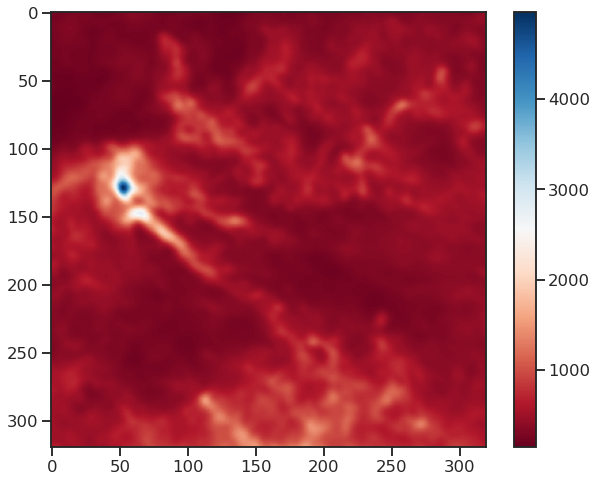

In [158]:
plt.figure(figsize = (10, 8))
plt.imshow(patch_ss,cmap='RdBu')
plt.colorbar()

In [168]:
header = set_header(0, 45, size_patch=3.75/60, Npix=320)


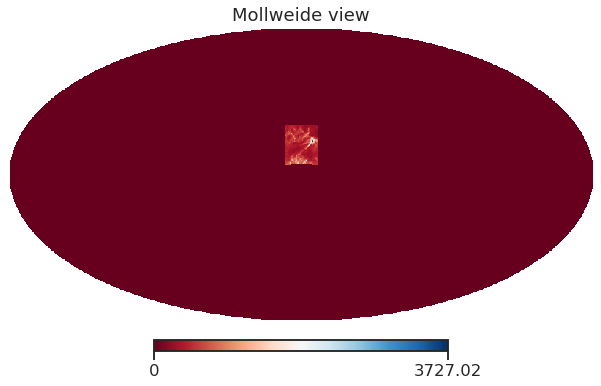

In [167]:
hp.mollview(dust_IQU[0]*patch_healpix[1], cmap='RdBu', ) 

Text(0, 0.5, '$\\mathcal{V}_3(\\rho$)')

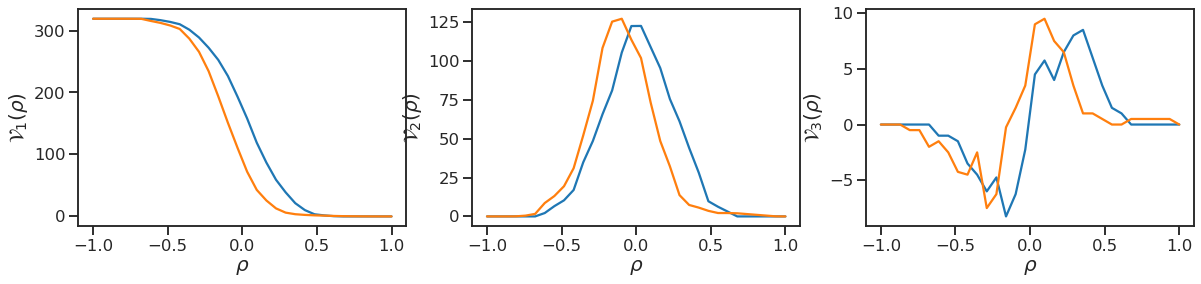

In [94]:
fig, axes = plt.subplots(1,3,figsize = (20,4))

axes[0].plot(rhos_ss, f_ss)
axes[0].plot(rhos_ss_pt, f_ss_pt)

axes[0].set_xlabel(r'$\rho$', fontsize=20)
axes[0].set_ylabel(r'$\mathcal{V}_1(\rho$)', fontsize=20)
axes[1].plot(rhos_ss, u_ss)
axes[1].plot(rhos_ss_pt, u_ss_pt)

axes[1].set_xlabel(r'$\rho$', fontsize=20)
axes[1].set_ylabel(r'$\mathcal{V}_2(\rho$)', fontsize=20)
axes[2].plot(rhos_ss, chi_ss)
axes[2].plot(rhos_ss, chi_ss_pt)

axes[2].set_xlabel(r'$\rho$', fontsize=20)
axes[2].set_ylabel(r'$\mathcal{V}_3(\rho$)', fontsize=20)

In [89]:
def rescale_min_max(img, a=-1, b=1, return_min_max=False):
    img_resc = (b-a)*(img-np.min(img))/(np.max(img)-np.min(img))+a
    if return_min_max:
        return img_resc, np.min(img), np.max(img)
    else:
        return img_resc

# load results

In [6]:
header0 = set_header(0, 45, size_patch=3.75/60, Npix=320)
header1 = set_header(45, 45, size_patch=3.75/60, Npix=320)
header2 = set_header(0, -45, size_patch=3.75/60, Npix=320)
header3 = set_header(315, 45, size_patch=3.75/60, Npix=320)
header4 = set_header(311, -56.5, size_patch=3.75/60, Npix=250)
header5 = set_header(45, -45, size_patch=3.75/60, Npix=320)

headers = [header0, header1, header2, header3, header4, header5]

In [9]:
savedir = '/global/cscratch1/sd/jianyao/Dust/MFs/'

In [3]:
nside_pre = 64

In [4]:
bicep2 = np.loadtxt("B2_3yr_373sqdeg_field_20140509.txt", delimiter=',')
bicep2_pix = hp.ang2pix(nside_pre, bicep2[:, 2], bicep2[:, 3], lonlat = True)

In [6]:
bicep2_pix[0]

43412

In [13]:
theta, phi = hp.pix2ang(64, 43412)

In [14]:
ra = np.rad2deg(phi)
dec = np.rad2deg(0.5 * np.pi - theta)

In [15]:
ra, dec

(334.16666666666663, -49.7023903266307)

In [16]:
hp.pix2ang(64, 43412, lonlat=True)

(334.16666666666663, -49.702390326630706)

In [21]:
patch_Q = np.random.rand(320, 320)
mask_tot = np.zeros(12*nside_pre**2)
for i in range(len(headers)):
    patch_healpix = f2h(patch_Q, headers[i], nside_pre)
    mask_tot += patch_healpix[1]

0.0 180.0 -180.0 180.0


Text(-0.40295364697926345, 0.5920417498322602, 'FFF')

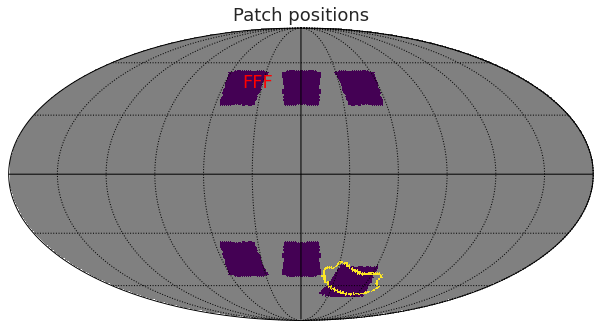

In [48]:
mask_tot[bicep2_pix] = 10
mask_tot[mask_tot==0] = hp.UNSEEN
hp.mollview(mask_tot, norm = 'hist', cbar = False, title = 'Patch positions', cmap = 'viridis')
hp.graticule()


# hp.projtext(316.08, -56.29, 'TTT', lonlat=True)
# hp.projtext(-45, -45, 'FFF', lonlat=True)

hp.projtext(45, 45, 'FFF', lonlat=True, color = 'red')

Text(0.40295364697926345, 0.5920417498322602, 'FFF')

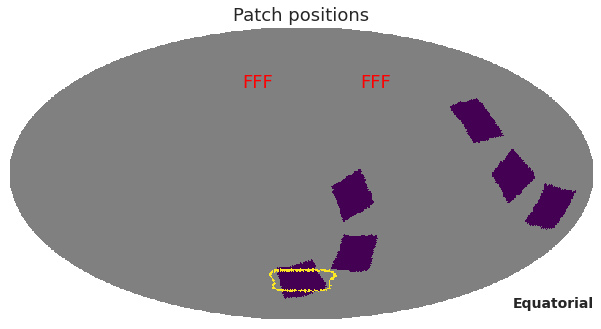

In [55]:
hp.mollview(mask_tot, norm = 'hist', cbar = False, title = 'Patch positions', cmap = 'viridis', coord = ['G', 'C'])
hp.projtext(45, 45, 'FFF', lonlat=True, color = 'red')
hp.projtext(-45, 45, 'FFF', lonlat=True, color = 'red')

# plt.scatter(np.deg2rad(0), np.deg2rad(0), color="r", marker="x", linewidth=10);
# plt.scatter(np.deg2rad(-60), np.deg2rad(0), color="r", marker="x", linewidth=10);
# plt.scatter(np.deg2rad(60), np.deg2rad(45), color="r", marker="x", linewidth=10);
# plt.scatter(np.deg2rad(0), np.deg2rad(10), color="r", marker="x", linewidth=10);
# plt.scatter(np.deg2rad(0), np.deg2rad(-60), color="r", marker="x", linewidth=10);

In [12]:
for i in range(5):
    # print(i, end=" ")
    print(i, sep=' ', end='', flush=True)

01234

In [14]:
get_MF(savedir, 50, headers) 

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 

In [15]:
F_ss_pt = np.load('/global/cscratch1/sd/jianyao/Dust/MFs/F_ss_pt.npy')
U_ss_pt = np.load('/global/cscratch1/sd/jianyao/Dust/MFs/U_ss_pt.npy')
Chi_ss_pt = np.load('/global/cscratch1/sd/jianyao/Dust/MFs/Chi_ss_pt.npy')

F_ss = np.load('/global/cscratch1/sd/jianyao/Dust/MFs/F_ss.npy')
U_ss = np.load('/global/cscratch1/sd/jianyao/Dust/MFs/U_ss.npy')
Chi_ss = np.load('/global/cscratch1/sd/jianyao/Dust/MFs/Chi_ss.npy')

F_pt_mean = np.mean(F_ss_pt, axis = 0); F_pt_std = np.std(F_ss_pt, axis = 0); 
U_pt_mean = np.mean(U_ss_pt, axis = 0); U_pt_std = np.std(U_ss_pt, axis = 0);
Chi_pt_mean = np.mean(Chi_ss_pt, axis = 0); Chi_pt_std = np.std(Chi_ss_pt, axis = 0);

F_mean = np.mean(F_ss, axis = 0); F_std = np.std(F_ss, axis = 0); 
U_mean = np.mean(U_ss, axis = 0); U_std = np.std(U_ss, axis = 0); 
Chi_mean = np.mean(Chi_ss, axis = 0); Chi_std = np.std(Chi_ss, axis = 0); 

In [16]:
F_mean.shape

(6, 3, 32)

# show the MF plots

In [17]:
def plot_MF(rhos_ss, F_mean, F_std, U_mean, U_std, Chi_mean, Chi_std, F_pt_mean, F_pt_std, U_pt_mean, U_pt_std, Chi_pt_mean, Chi_pt_std, title):
    
    """
    input: with shape(3, N) for 3 Stokes
    """
    fig, axes = plt.subplots(3,3,figsize = (25,20))
    stokes = ["I, ", "Q, ", "U, "]
    for i in range(3):
        axes[i][0].plot(rhos_ss, F_mean[i], label = 'SS of IQU')
        axes[i][0].fill_between(rhos_ss, (F_mean - F_std)[i], (F_mean + F_std)[i], alpha = 0.3)
        axes[i][0].plot(rhos_ss, F_pt_mean[i], label = 'SS of IQU from iqu')
        axes[i][0].fill_between(rhos_ss, (F_pt_mean - F_pt_std)[i], (F_pt_mean + F_pt_std)[i], alpha = 0.3)
        axes[i][0].legend(fontsize = 15)

        axes[i][0].set_xlabel(r'$\rho$', fontsize=15)
        axes[i][0].set_ylabel(r'$\mathcal{V}_1(\rho$)', fontsize=15)

        axes[i][1].plot(rhos_ss, U_mean[i])
        axes[i][1].fill_between(rhos_ss, (U_mean - U_std)[i], (U_mean + U_std)[i], alpha = 0.3)
        axes[i][1].plot(rhos_ss, U_pt_mean[i])
        axes[i][1].fill_between(rhos_ss, (U_pt_mean - U_pt_std)[i], (U_pt_mean + U_pt_std)[i], alpha = 0.3)

        axes[i][1].set_xlabel(r'$\rho$', fontsize=15)
        axes[i][1].set_ylabel(r'$\mathcal{V}_2(\rho$)', fontsize=15)
        axes[i][1].set_title(stokes[i] + title, fontsize=20)

        axes[i][2].plot(rhos_ss, Chi_mean[i])
        axes[i][2].fill_between(rhos_ss, (Chi_mean - Chi_std)[i], (Chi_mean + Chi_std)[i], alpha = 0.3)
        axes[i][2].plot(rhos_ss, Chi_pt_mean[i])
        axes[i][2].fill_between(rhos_ss, (Chi_pt_mean - Chi_pt_std)[i],(Chi_pt_mean + Chi_pt_std)[i], alpha = 0.3)

        axes[i][2].set_xlabel(r'$\rho$', fontsize=15)
        axes[i][2].set_ylabel(r'$\mathcal{V}_3(\rho$)', fontsize=15)

    # fig.legend(ncol = 2, loc = (0.35, 0.9))
    # fig.suptitle(title, fontsize = 15)
    plt.show()

In [18]:
empty_image = np.random.rand(320, 320)
img = rescale_min_max(empty_image)
rhos_ss, f, u, chi= get_functionals(img)

In [19]:
rhos_ss.shape

(32,)

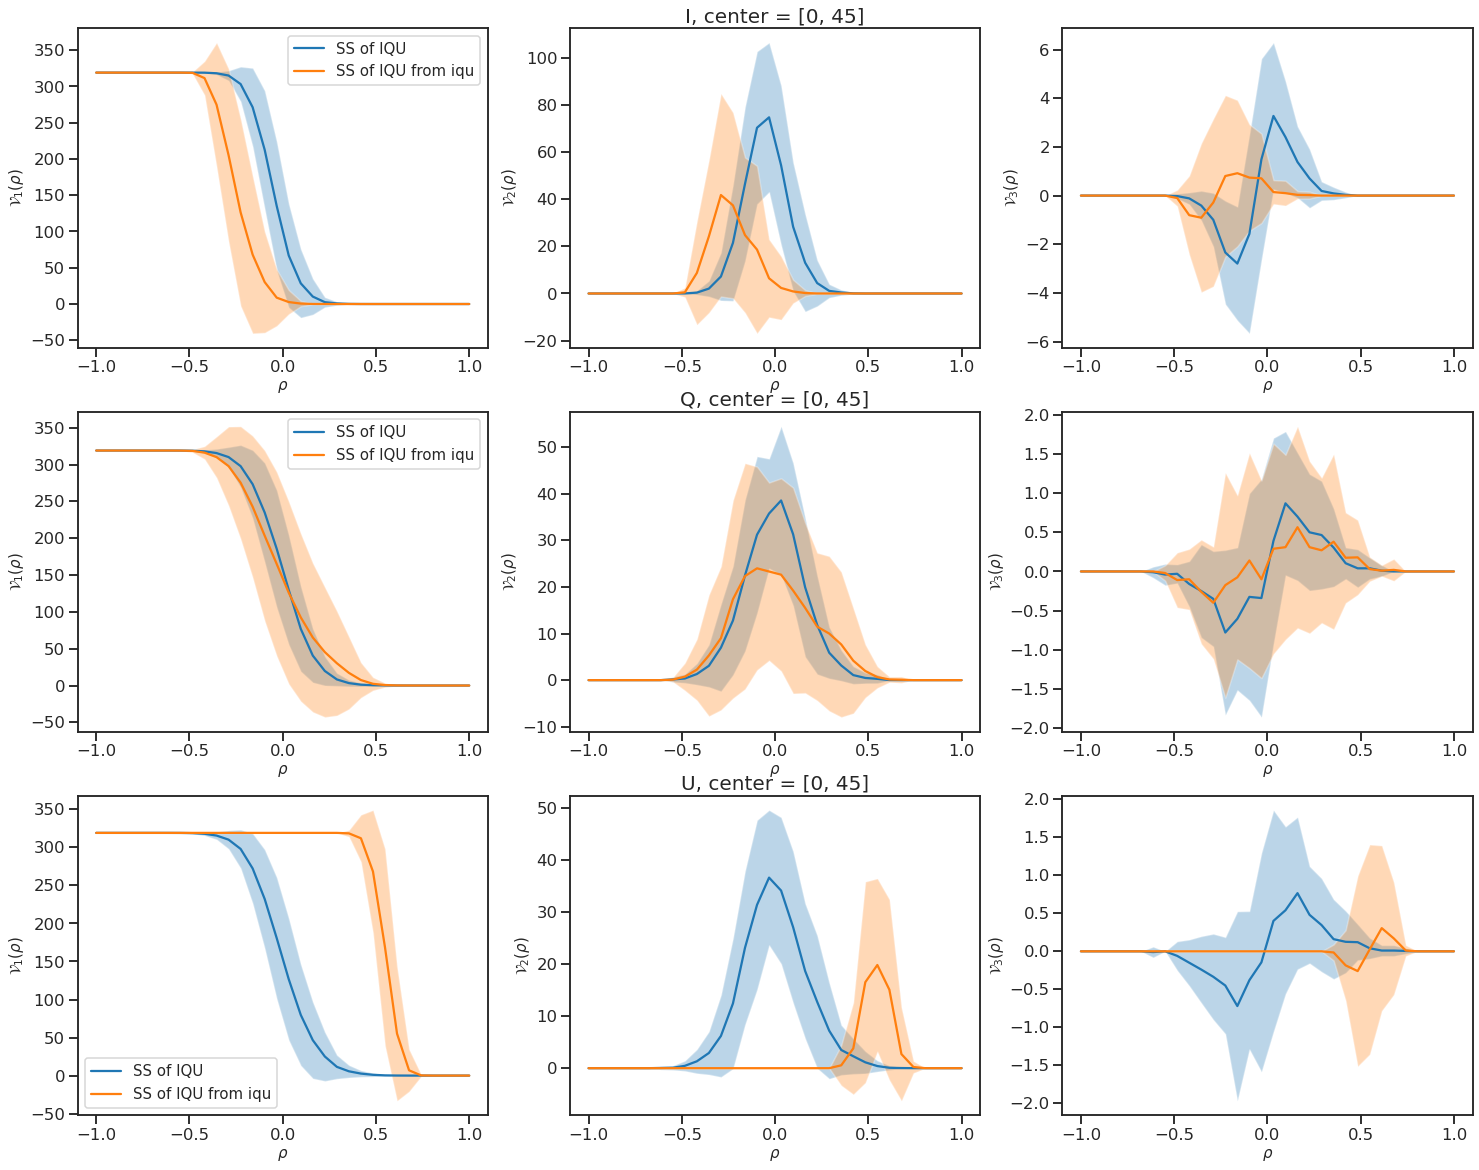

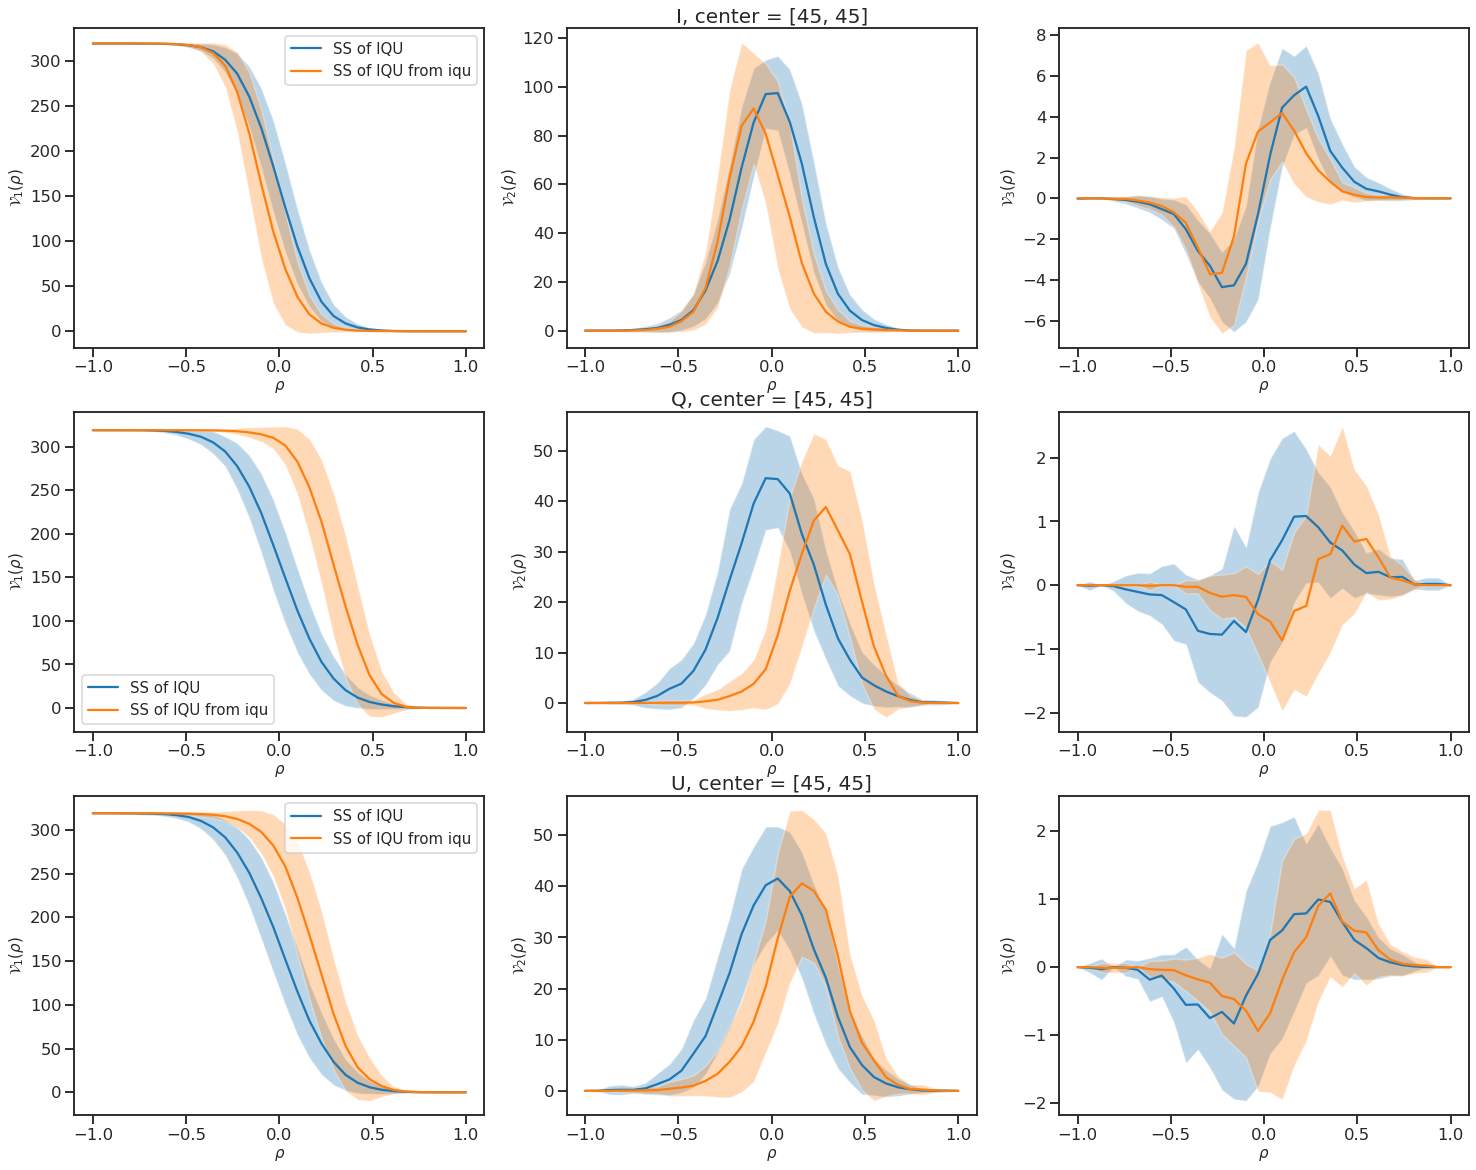

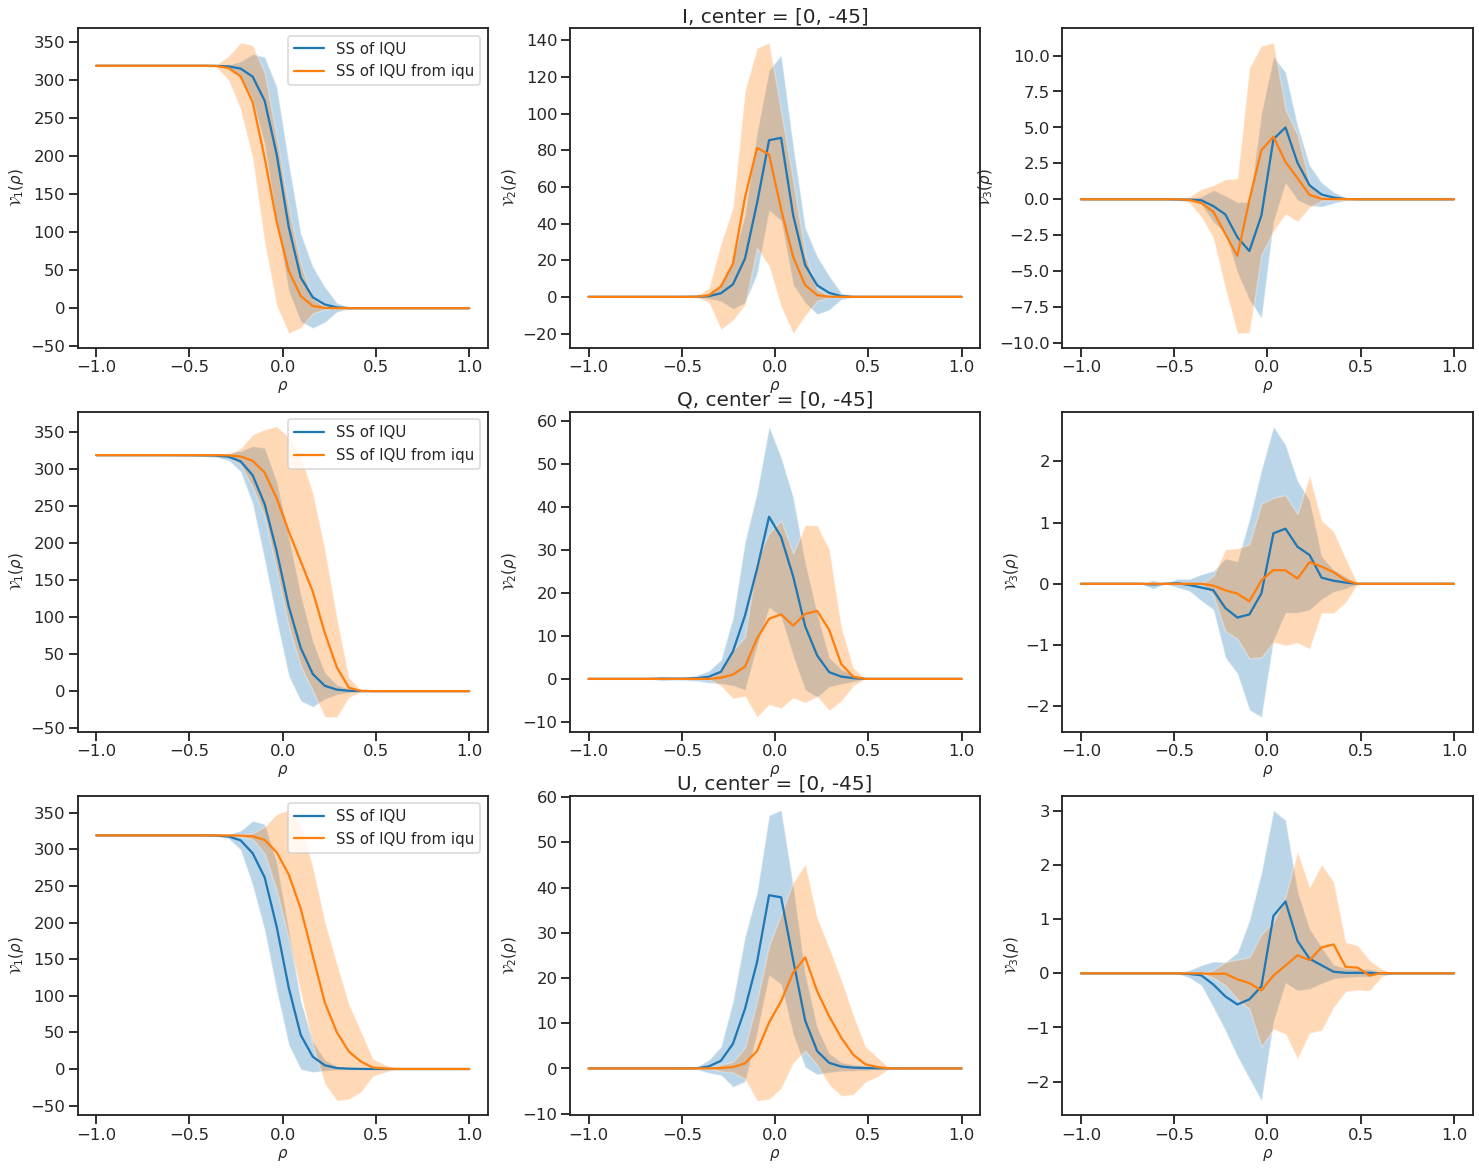

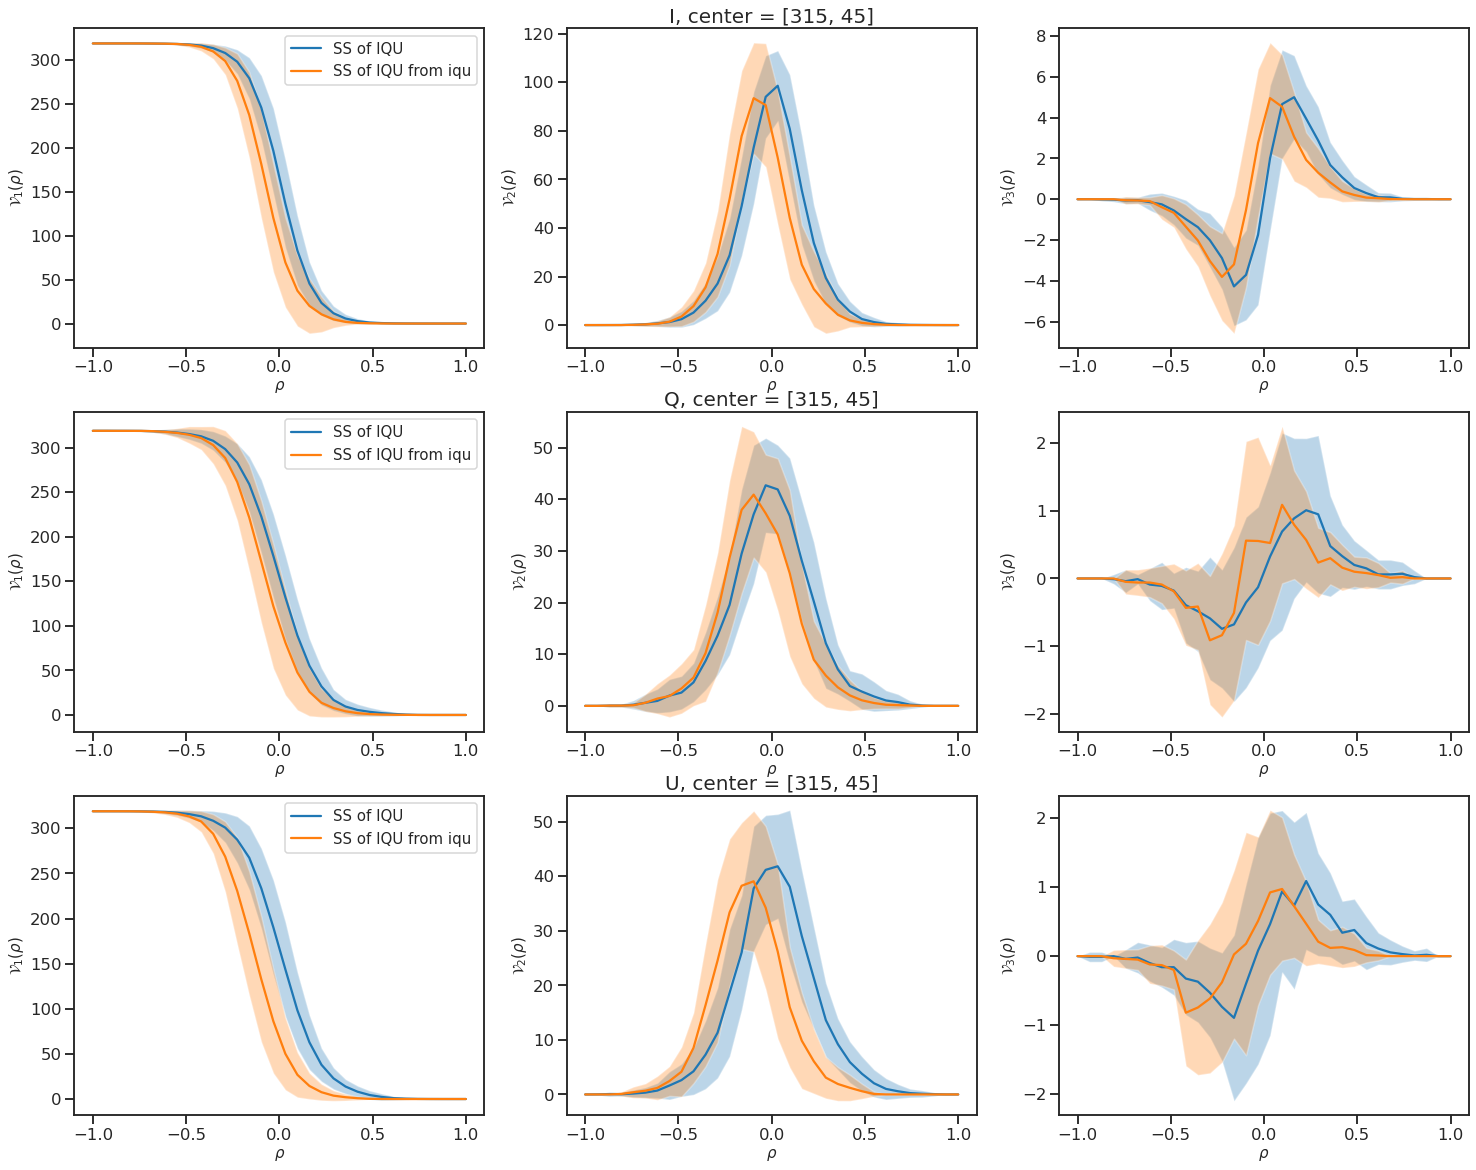

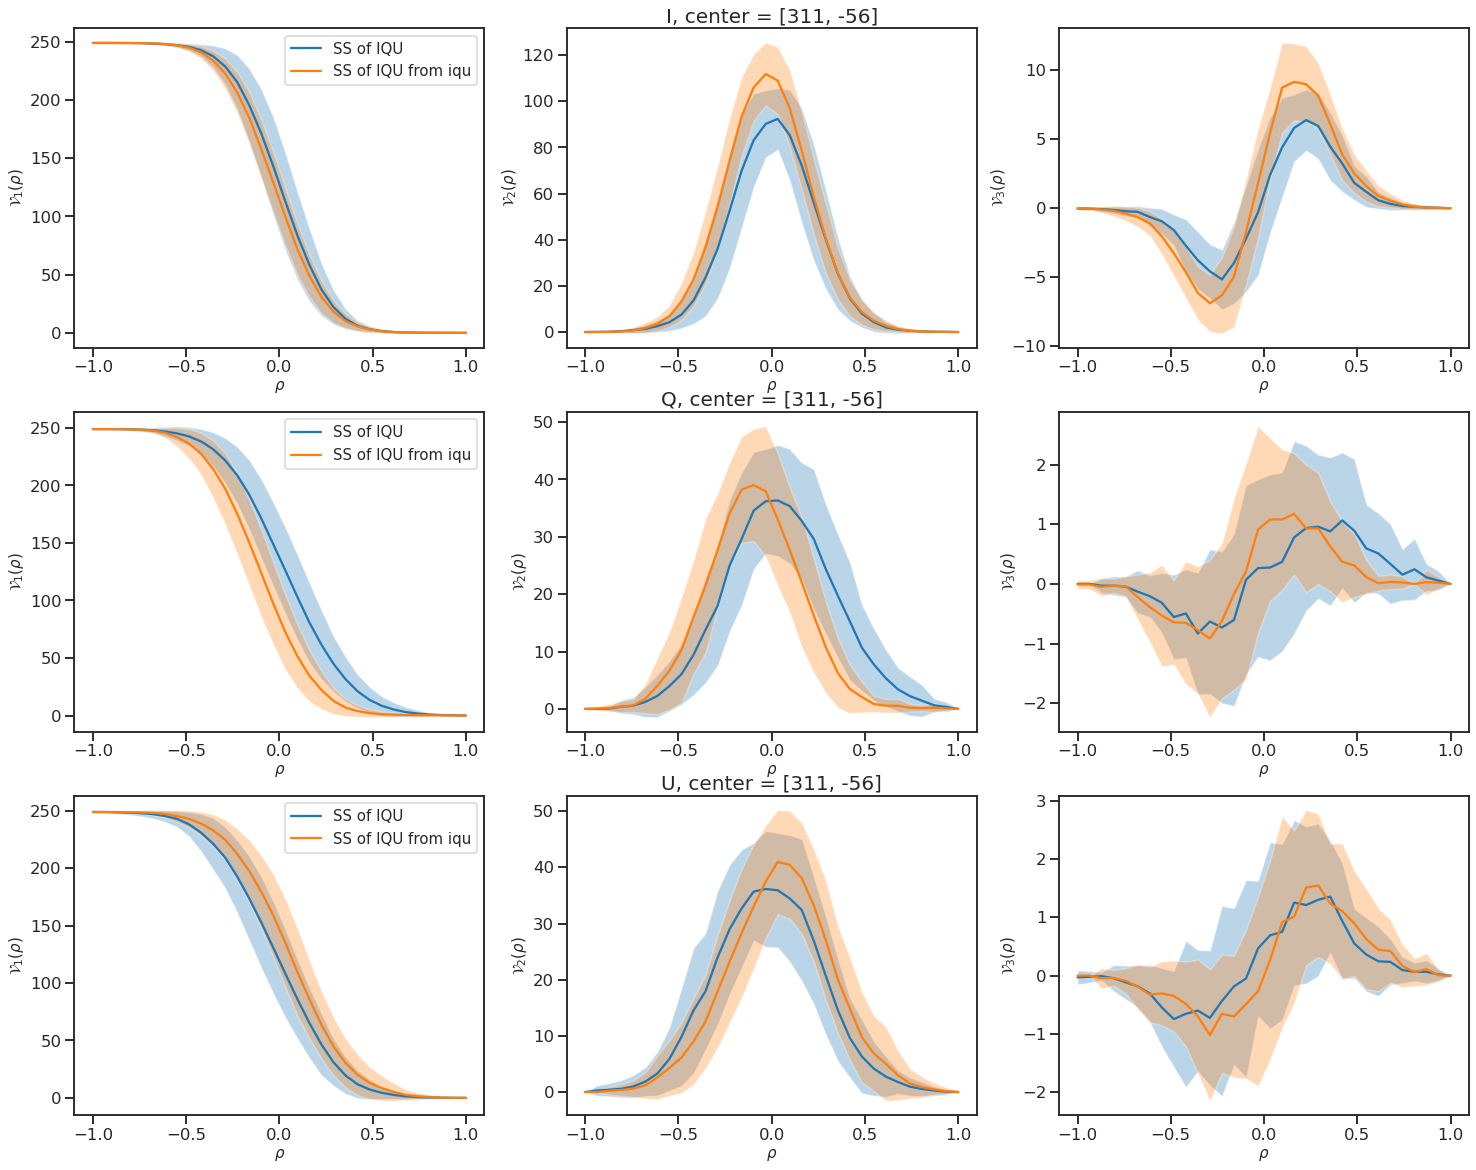

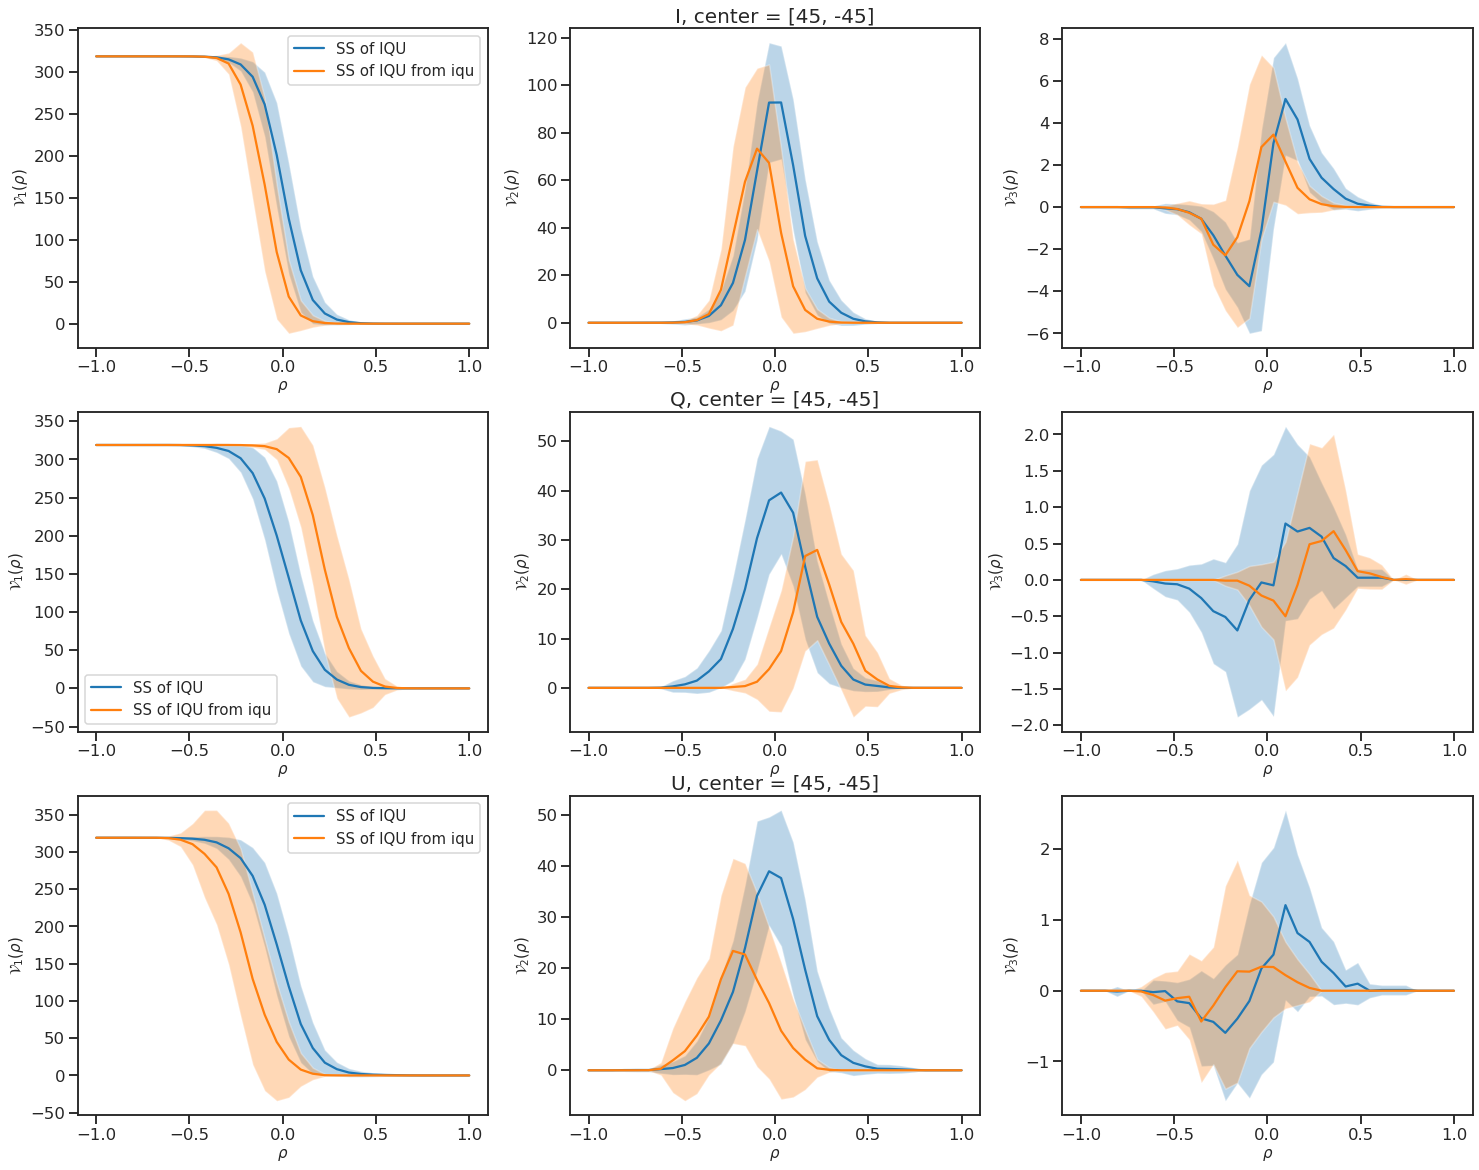

In [20]:
centers = ["0, 45", "45, 45", "0, -45", "315, 45", "311, -56", "45, -45"]

for i in range(6):
    plot_MF(rhos_ss, F_mean[i], F_std[i], U_mean[i], U_std[i], Chi_mean[i], Chi_std[i], F_pt_mean[i], F_pt_std[i], U_pt_mean[i], U_pt_std[i], Chi_pt_mean[i], Chi_pt_std[i], "center = [%s]"%(centers[i]))

# Map Results

In [67]:
nside_pre = 2048
patch_Q = np.random.rand(320, 320)
mask_tot = np.zeros(12*nside_pre**2)
for i in range(len(headers)):
    patch_healpix = f2h(patch_Q, headers[i], nside_pre)
    mask_tot += patch_healpix[1]

In [21]:
iqu_ss_only = hp.read_map("/global/cscratch1/sd/jianyao/Dust/MFs/dust_IQU_from_iqu_only_small_scales_000.fits", field = None)
IQU_iqu = hp.read_map("/global/cscratch1/sd/jianyao/Dust/MFs/dust_IQU_from_iqu_with_small_scales.fits", field = None) # iqu with small added
IQU_ss_only = hp.read_map("/global/cscratch1/sd/jianyao/Dust/MFs/dust_IQU_only_small_scales_000.fits", field = None)
IQU = hp.read_map(savedir + f"dust_IQU_with_small_scales.fits", field = None) # IQU with small scales added

In [9]:
dust_IQU = hp.read_map('/global/cscratch1/sd/jianyao/Dust/Dust_IQU_uK_RJ.fits', field = None)

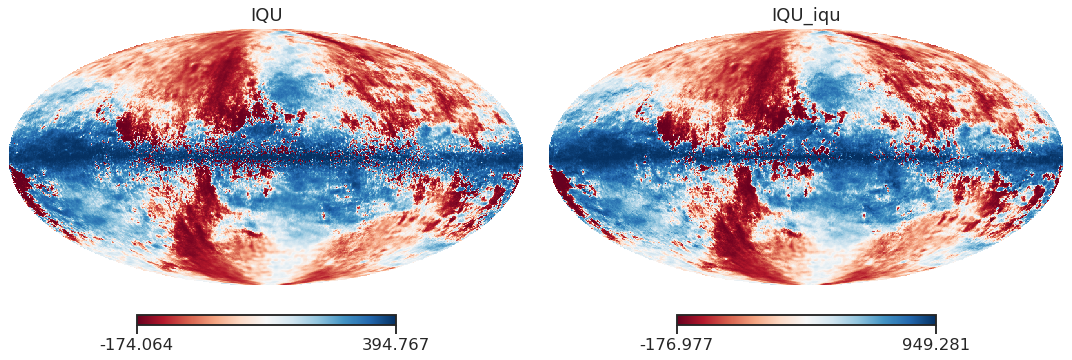

In [22]:
plt.figure(figsize = (15,8))
hp.mollview(IQU[1], norm = 'hist',cmap='RdBu', title = 'IQU', sub = 121)
hp.mollview(IQU_iqu[1], norm = 'hist',cmap='RdBu', title = 'IQU_iqu', sub = 122)

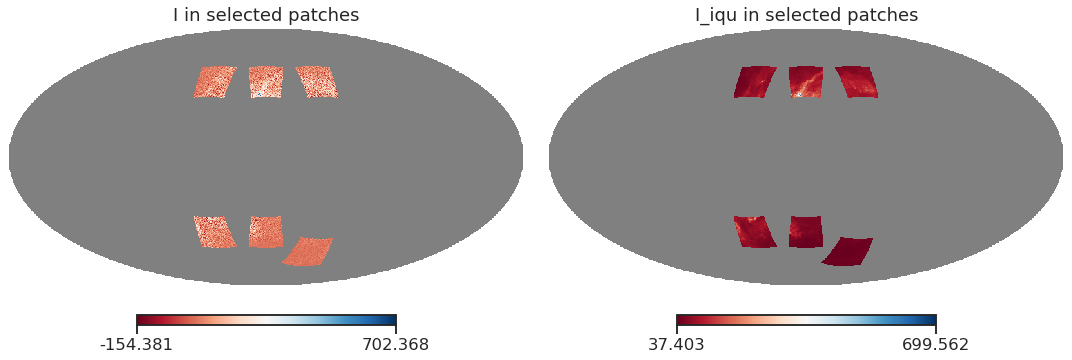

In [101]:
plt.figure(figsize = (15,8))
hp.mollview(Mask(IQU[0], mask_tot), cmap='RdBu', title = "I in selected patches", sub = 121)
hp.mollview(Mask(IQU_iqu[0], mask_tot), cmap='RdBu', title = "I_iqu in selected patches", sub = 122)

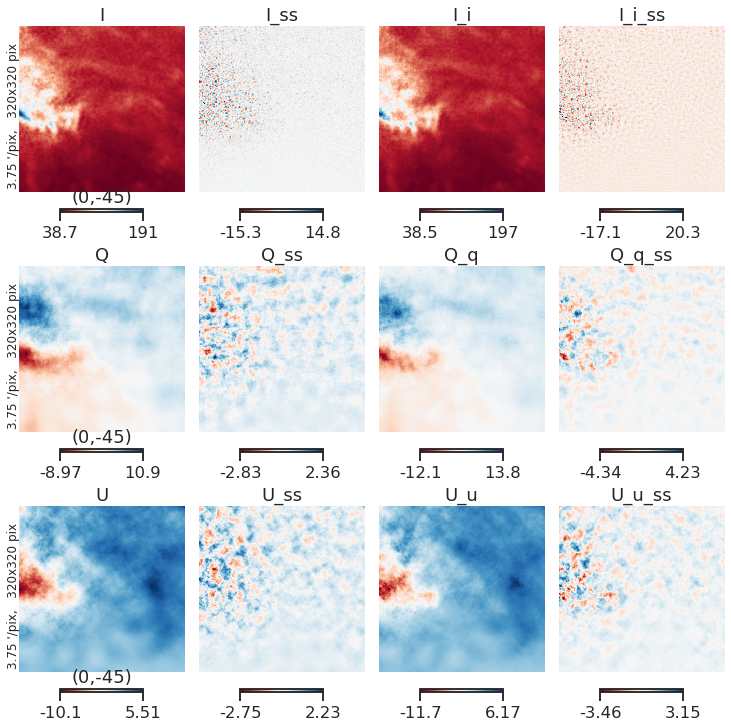

In [34]:
zoom_plot(IQU, IQU_ss_only, IQU_iqu, iqu_ss_only, center = [0,-45])

## power spectra

In [10]:
planck_mask_filename = "/global/cscratch1/sd/jianyao/Dust/" + "HFI_Mask_GalPlane-apo2_2048_R2.00.fits"
planck_mask_80 = hp.read_map(planck_mask_filename, ["GAL080"])

In [14]:
ell, cl_norm, cl_IQU = run_namaster(IQU, mask=planck_mask_80, lmax=output_lmax, nlbins = 10)
ell, cl_norm, cl_IQU_from_iqu = run_namaster(IQU_iqu, mask=planck_mask_80, lmax=output_lmax, nlbins = 10)

In [15]:
ell, cl_norm, cl_IQU_ori = run_namaster(dust_IQU, mask=planck_mask_80, lmax=output_lmax, nlbins = 10)

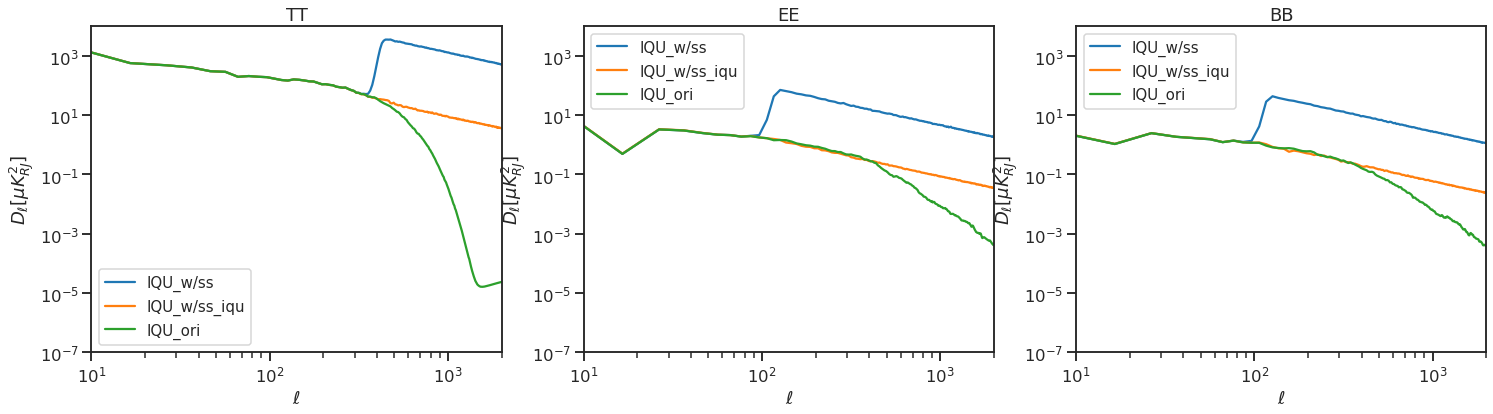

In [57]:
modes = ['TT', 'EE', 'BB']
cl_all = [cl_IQU, cl_IQU_from_iqu, cl_IQU_ori]
names = ['IQU_w/ss', 'IQU_w/ss_iqu', 'IQU_ori']
fig, axes = plt.subplots(1,3, figsize=(25,6))
for i in range(3):
    ax = axes[i]
    for j in range(3):
        ax.loglog(ell,  cl_norm*cl_all[j][modes[i]], label = names[j])
    ax.set_title(modes[i])
    ax.legend(fontsize=15)  
    ax.set_ylabel("$ D_\ell  [\mu K^2_{RJ}]$")
    ax.set_xlabel(("$\ell$"))
    ax.set_xlim(10,2e3) 
    ax.set_ylim(1e-7, 1e4)
# fig.suptitle('PS for large-scale only', fontsize = 15)

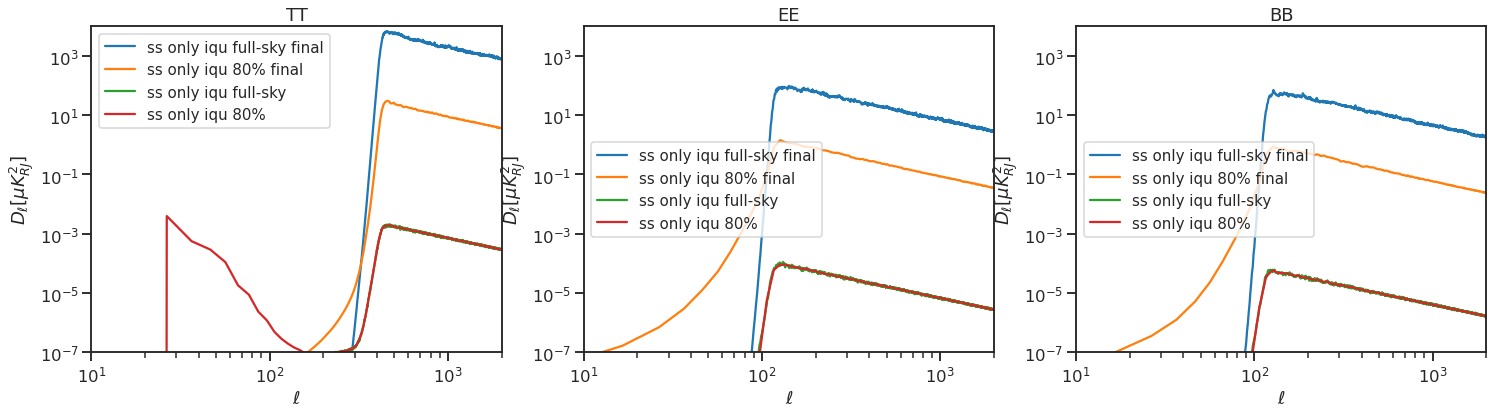

In [50]:
fig, axes = plt.subplots(1,3, figsize=(25,6))
for i in range(3):
    ax = axes[i]
    ax.loglog(ell_hp,  cl_norm_hp*cl_ss_only_IQU_from_iqu_hp_final[modes[i]], label = 'ss only iqu full-sky final')
    ax.loglog(ell,  cl_norm*cl_ss_only_IQU_from_iqu_final[modes[i]], label = 'ss only iqu 80% final')
    
    ax.loglog(ell_hp,  cl_norm_hp*cl_ss_only_IQU_from_iqu_hp[modes[i]], label = 'ss only iqu full-sky')
    ax.loglog(ell,  cl_norm*cl_ss_only_IQU_from_iqu[modes[i]], label = 'ss only iqu 80%')
    
    ax.set_ylim(1e-7, 1e4)
    ax.set_title(modes[i])
    ax.legend(fontsize=15)  
    ax.set_ylabel("$ D_\ell  [\mu K^2_{RJ}]$")
    ax.set_xlabel(("$\ell$"))
    ax.set_xlim(10,2e3)

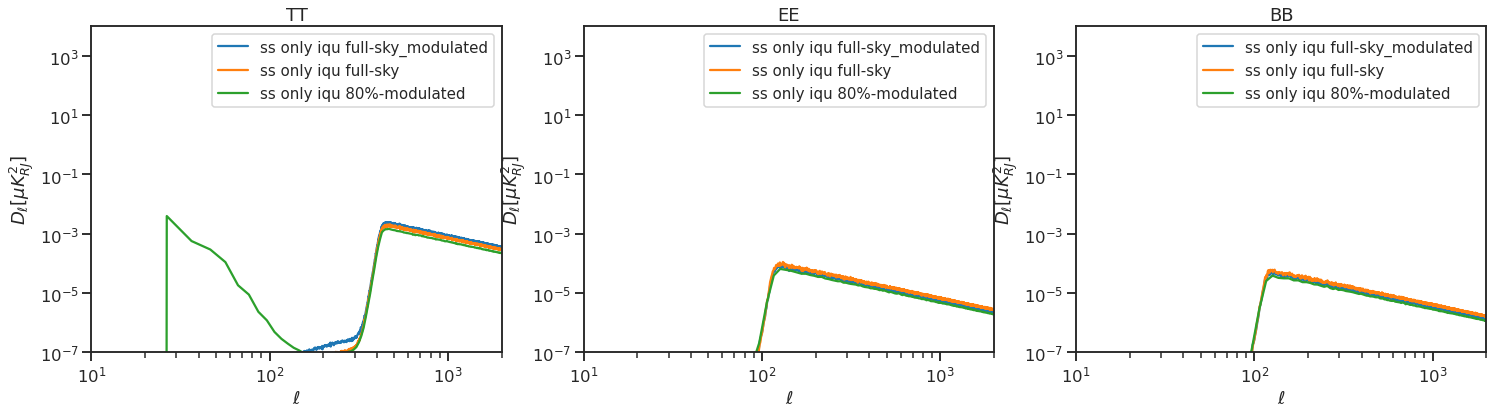

In [54]:
fig, axes = plt.subplots(1,3, figsize=(25,6))
for i in range(3):
    ax = axes[i]
    ax.loglog(ell_hp,  cl_norm_hp*cl_ss_only_IQU_from_iqu_hp_mod[modes[i]], label = 'ss only iqu full-sky_modulated')
    ax.loglog(ell_hp,  cl_norm_hp*cl_ss_only_IQU_from_iqu_hp[modes[i]], label = 'ss only iqu full-sky')
    ax.loglog(ell,  cl_norm*cl_ss_only_IQU_from_iqu_mod[modes[i]], label = 'ss only iqu 80%-modulated')
    ax.set_title(modes[i])
    ax.legend(fontsize=15)  
    ax.set_ylabel("$ D_\ell  [\mu K^2_{RJ}]$")
    ax.set_xlabel(("$\ell$"))
    ax.set_xlim(10,2e3) 
    ax.set_ylim(1e-7, 1e4)

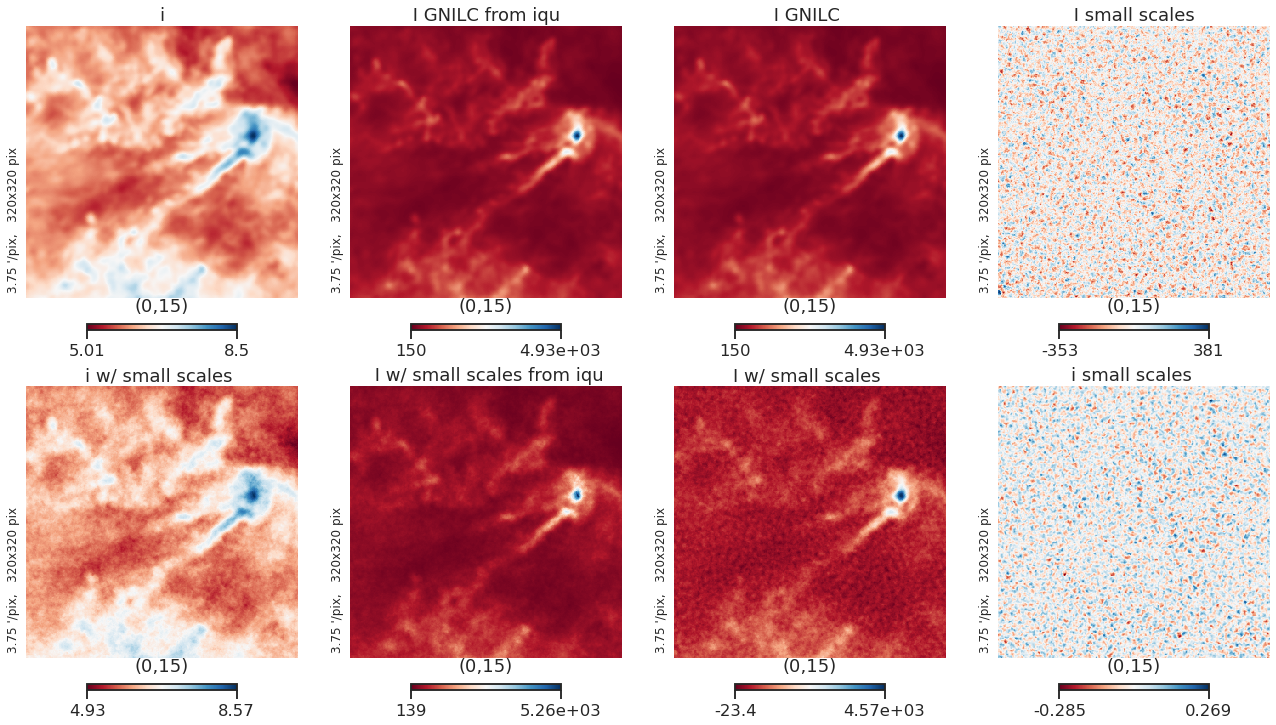

In [192]:
lat=15
plt.figure(figsize=(18,10))
hp.gnomview(iqu_ori[0],cmap='RdBu',  title='i', rot=[0,lat],reso=3.75,xsize=320, sub=241 )
hp.gnomview((IQU_ori_from_iqu[0]),cmap='RdBu',  title=' I GNILC from iqu ', rot=[0,lat],reso=3.75,xsize=320,  sub=242, )
hp.gnomview((IQU_ori[0]),cmap='RdBu',  title=' I GNILC  ', rot=[0,lat],reso=3.75,xsize=320,  sub=243, )
# hp.gnomview((modulate_amp),cmap='RdBu',  title=' modulation I ', rot=[0,lat],reso=3.75,xsize=320,  sub=233, )
hp.gnomview(IQU_ss_only[0], cmap='RdBu',  title=' I small scales ', rot=[0,lat],reso=3.75,xsize=320,  sub=244, )
hp.gnomview(iqu[0] ,cmap='RdBu',   title='i w/ small scales ', rot=[0,lat],reso=3.75,xsize=320,  sub=245 )
hp.gnomview(IQU_from_iqu[0], cmap='RdBu',  title=' I w/ small scales from iqu', rot=[0,lat],reso=3.75,xsize=320,  sub=246, )
hp.gnomview(IQU[0],cmap='RdBu' ,  title='I w/ small scales ', rot=[0,lat],reso=3.75,xsize=320,  sub=247 )
hp.gnomview(iqu_ss_only[0],cmap='RdBu',  title='i small scales ', rot=[0,lat], reso=3.75,xsize=320, sub=248 )

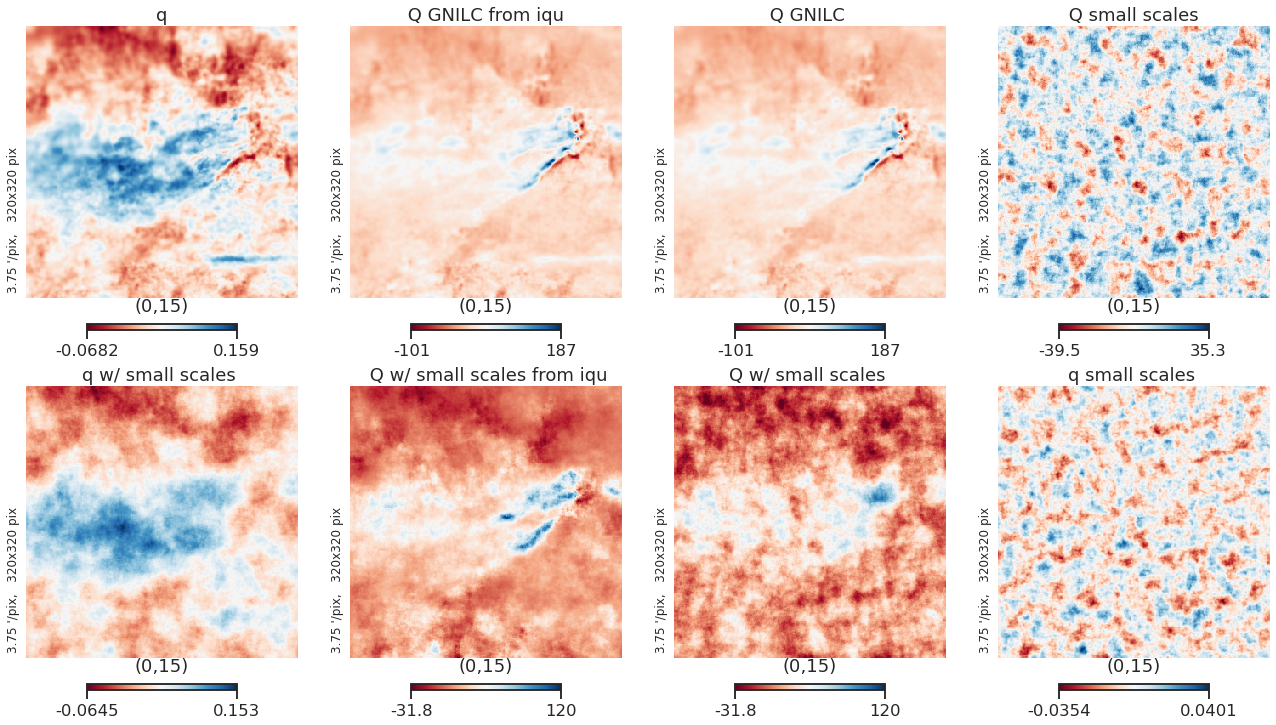

In [195]:
lat=15
plt.figure(figsize=(18,10))
hp.gnomview(iqu_ori[1],cmap='RdBu',  title='q', rot=[0,lat],reso=3.75,xsize=320, sub=241 )
hp.gnomview((IQU_ori_from_iqu[1]),cmap='RdBu',  title=' Q GNILC from iqu ', rot=[0,lat],reso=3.75,xsize=320,  sub=242, )
hp.gnomview((IQU_ori[1]),cmap='RdBu',  title=' Q GNILC  ', rot=[0,lat],reso=3.75,xsize=320,  sub=243, )
# hp.gnomview((modulate_amp),cmap='RdBu',  title=' modulation I ', rot=[0,lat],reso=3.75,xsize=320,  sub=233, )
hp.gnomview(IQU_ss_only[1], cmap='RdBu',  title=' Q small scales ', rot=[0,lat],reso=3.75,xsize=320,  sub=244, )
hp.gnomview(iqu[1] ,cmap='RdBu',   title='q w/ small scales ', rot=[0,lat],reso=3.75,xsize=320,  sub=245 )
hp.gnomview(IQU_from_iqu[1], cmap='RdBu',  title=' Q w/ small scales from iqu', rot=[0,lat],reso=3.75,xsize=320,  sub=246, min = -31.8, max = 120)
hp.gnomview(IQU[1],cmap='RdBu' ,  title='Q w/ small scales ', rot=[0,lat],reso=3.75,xsize=320,  sub=247, min = -31.8, max = 120)
hp.gnomview(iqu_ss_only[1],cmap='RdBu',  title='q small scales ', rot=[0,lat], reso=3.75,xsize=320, sub=248 )

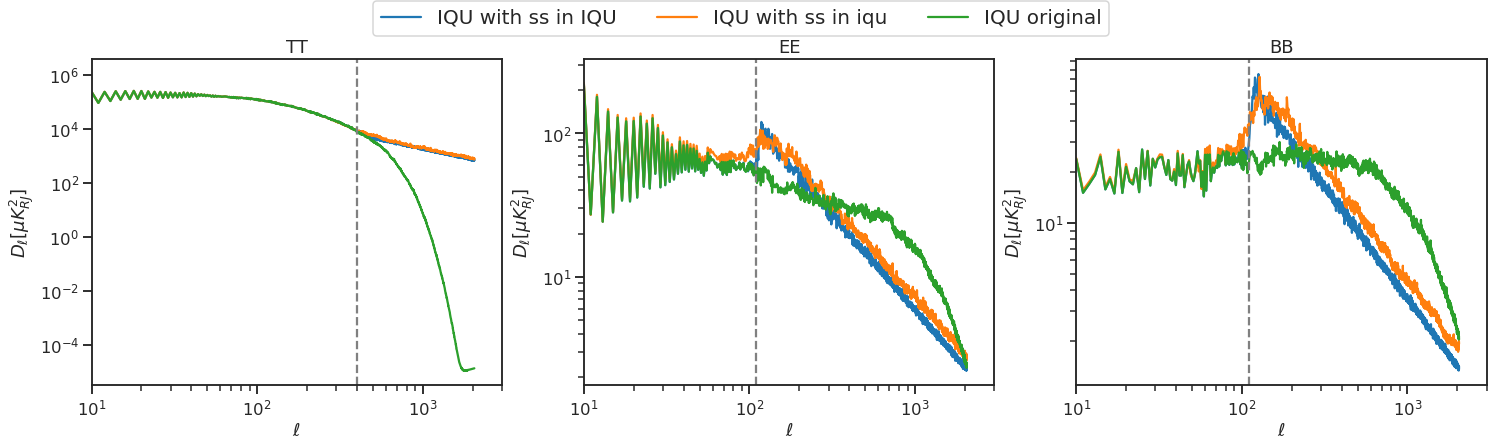

In [91]:
modes = ['TT', 'EE', 'BB']
fig, axes = plt.subplots(1,3, figsize=(25,6))
for i in range(3):
    ax = axes[i]
    
    if i == 0:
        ax.loglog(ell,  cl_norm*(cl_IQU[modes[i]]), label = 'IQU with ss in IQU'); 
        ax.loglog(ell,  cl_norm*(cl_IQU_from_iqu[modes[i]]), label = 'IQU with ss in iqu'); 
        ax.loglog(ell,  cl_norm*(cl_IQU_ori[modes[i]]), label = 'IQU original'); 
    else:
        ax.loglog(ell,  cl_norm*(cl_IQU[modes[i]])); 
        ax.loglog(ell,  cl_norm*(cl_IQU_from_iqu[modes[i]])); 
        ax.loglog(ell,  cl_norm*(cl_IQU_ori[modes[i]])); 
    
    ax.set_title(modes[i])
    ax.set_ylabel("$ D_\ell  [\mu K_{RJ}^2]$")
    ax.set_xlabel(("$\ell$"))
    ax.set_xlim(10,3e3) 
    
    # ax.axvline(ell_fit_low[modes[i]], linestyle="--", color="black")
    ax.axvline(ell_fit_high[modes[i]], linestyle="--", color="gray")

fig.legend(loc = (0.25, 0.92), ncol = 3, fontsize = 20)

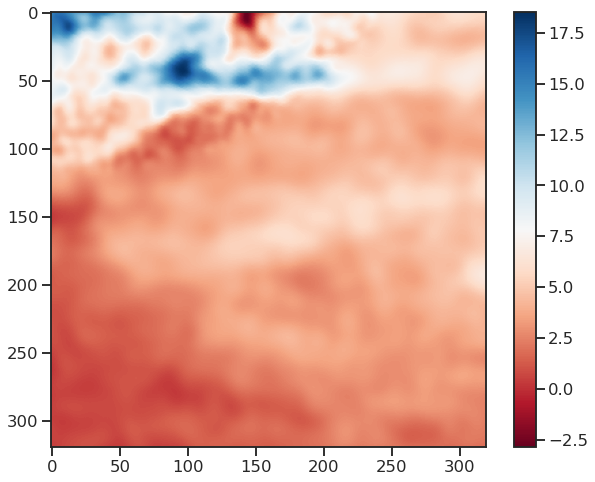

In [111]:
header = set_header(-45, -45, size_patch=3.75/60, Npix=320)
patch_Q = h2f(dust_IQU[1], header)
plt.figure(figsize = (10, 8))
plt.imshow(patch_Q,cmap='RdBu')
plt.colorbar()

# definitions

In [203]:
print("%03d"%11)

011


In [69]:
def Mask(m, mask):
    '''
    mask: the masked pixel is 0.
    '''
    masked = hp.ma(m)
    masked.mask = np.logical_not(mask)
    
    return masked

In [13]:
def get_MF(path, N,  headers):
    patch_num = len(headers)
    # 32 is the number of intervals to calculate the MFs
    F_ss_pt = np.zeros((N, patch_num, 3, 32)); U_ss_pt = np.zeros((N, patch_num, 3, 32)); Chi_ss_pt = np.zeros((N, patch_num, 3, 32));
    F_ss = np.zeros((N, patch_num, 3, 32)); U_ss = np.zeros((N, patch_num, 3, 32)); Chi_ss = np.zeros((N, patch_num, 3, 32));
    for i in range(N):
        print(i, end=" ")
        ss = hp.read_map(path + "dust_IQU_only_small_scales_%03d.fits"%i, field = None)
        ss_pt = hp.read_map(path+"dust_IQU_from_iqu_only_small_scales_%03d.fits"%i, field = None)
        
        for j in range(patch_num):
            
            for k in range(3): # loop in the stokes parameters
                
                patch_ss = h2f(ss[k], headers[j])
                patch_ss_pt = h2f(ss_pt[k], headers[j])

                img_ss_pt = rescale_min_max(patch_ss_pt)
                rhos_ss_pt, F_ss_pt[i, j, k], U_ss_pt[i, j, k], Chi_ss_pt[i, j, k] = get_functionals(img_ss_pt)

                img_ss = rescale_min_max(patch_ss)
                rhos_ss, F_ss[i, j, k], U_ss[i, j, k], Chi_ss[i, j, k] = get_functionals(img_ss)

    np.save('/global/cscratch1/sd/jianyao/Dust/MFs/F_ss_pt.npy', F_ss_pt);
    np.save('/global/cscratch1/sd/jianyao/Dust/MFs/U_ss_pt.npy', U_ss_pt);
    np.save('/global/cscratch1/sd/jianyao/Dust/MFs/Chi_ss_pt.npy', Chi_ss_pt);
    np.save('/global/cscratch1/sd/jianyao/Dust/MFs/F_ss.npy', F_ss);
    np.save('/global/cscratch1/sd/jianyao/Dust/MFs/U_ss.npy', U_ss);
    np.save('/global/cscratch1/sd/jianyao/Dust/MFs/Chi_ss.npy', Chi_ss);

In [54]:
def zoom_plot(IQU, IQU_ss_only, IQU_iqu, IQU_iqu_ss_only, center, unify = False):
    names_IQU = ["I", "Q", "U"];
    names_iqu = ["I_i", "Q_q", "U_u"];
    
    plt.figure(figsize=(10,10))
    for i in range(3):
        
        if unify:
            
            IQU_img = hp.gnomview(IQU[i], rot=center,reso=3.75,xsize=320, no_plot=True, return_projected_map=True)
            IQU_ss_img = hp.gnomview(IQU_ss_only[i], rot=center, reso=3.75,xsize=320, no_plot=True, return_projected_map=True)

            IQU_iqu_img = hp.gnomview(IQU_iqu[i], rot=center,reso=3.75,xsize=320, no_plot=True, return_projected_map=True)
            IQU_iqu_ss_img = hp.gnomview(IQU_iqu_ss_only[i], rot=center,reso=3.75,xsize=320, no_plot=True, return_projected_map=True)
        
            IQU_lim = [np.min((IQU_img, IQU_iqu_img)), np.max((IQU_img, IQU_iqu_img))]; 
            ss_lim = [np.min((IQU_ss_img, IQU_iqu_ss_img)), np.max((IQU_ss_img, IQU_iqu_ss_img))]
        else:
            IQU_lim = [None, None]; 
            ss_lim = [None, None]
            
        hp.gnomview(IQU[i],cmap='RdBu',  title='%s'%names_IQU[i], rot=center,reso=3.75,xsize=320, sub=(3, 4, 1 + i*4), min = IQU_lim[0], max = IQU_lim[1])
        hp.gnomview(IQU_ss_only[i],cmap='RdBu',  title='%s_ss'%names_IQU[i], rot=center, reso=3.75,xsize=320, sub=(3, 4, 2 + i*4), notext=True, min = ss_lim[0], max = ss_lim[1])
        
        hp.gnomview(IQU_iqu[i],cmap='RdBu',  title='%s'%names_iqu[i], rot=center,reso=3.75,xsize=320, sub=(3, 4, 3 + i*4), notext=True, min = IQU_lim[0], max = IQU_lim[1])
        hp.gnomview(IQU_iqu_ss_only[i],cmap='RdBu',  title='%s_ss'%names_iqu[i], rot=center,reso=3.75,xsize=320, sub=(3, 4, 4 + i*4), notext=True, min = ss_lim[0], max = ss_lim[1])
    

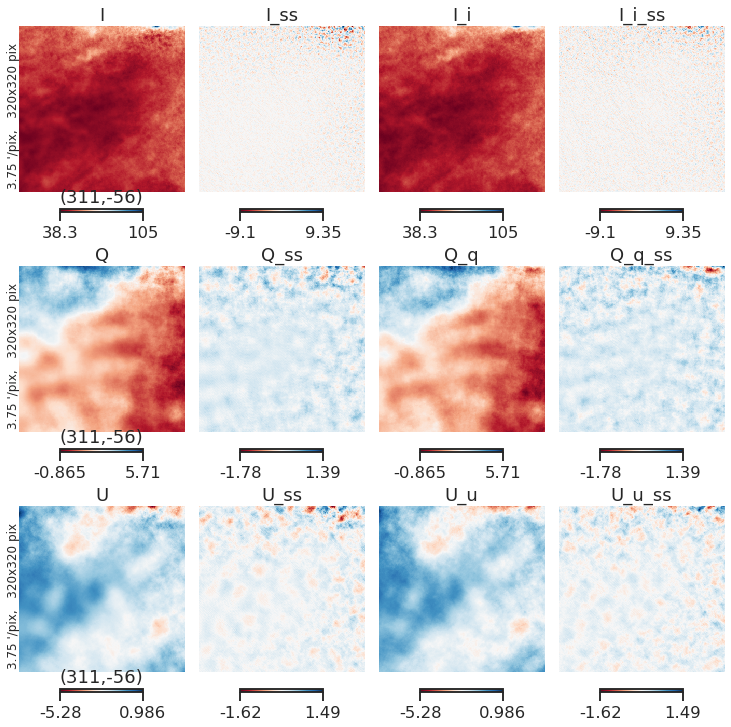

In [61]:
zoom_plot(IQU, IQU_ss_only, IQU_iqu, iqu_ss_only, center = [311,-56], unify = True)